In [ ]:
WAP that:
- Loads the famous Iris dataset using sklearn
- Splits the dataset into training ( 70% ) and testing ( 30% )
- Trains a decision tree classifier on the training data.
- Evaluates the classifier's performance using accuracy, precisionm recall and F1 Score Metrics.
- Generates & Visualizes a confusion Matrix for the test, set predictions.
- Plots the ROC (Reciever Operating Characteristics) Curves & Computes the AUC ( Area Under Curve ) for each class of the dataset
- Visualises the trained decision tre using plot_tree().

#The ROC Curve is a graphical plot used to evaluate the performance of a classification model
- It shows the trade-off between the True Positive Rate ( TPR ), also called Sensitivity or ReCall, and the FPR across different Classification Thresholds.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
y_pred = clf.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

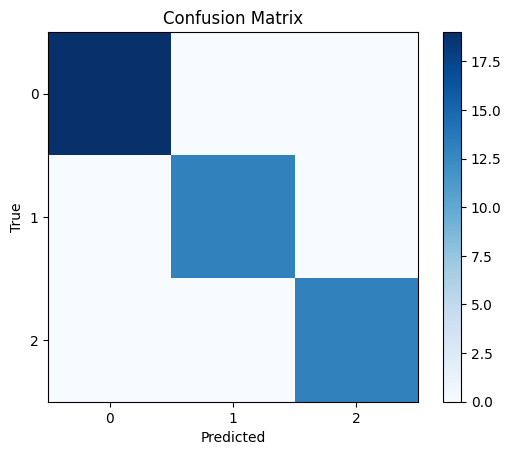

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(len(iris.target_names)))
plt.yticks(range(len(iris.target_names)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

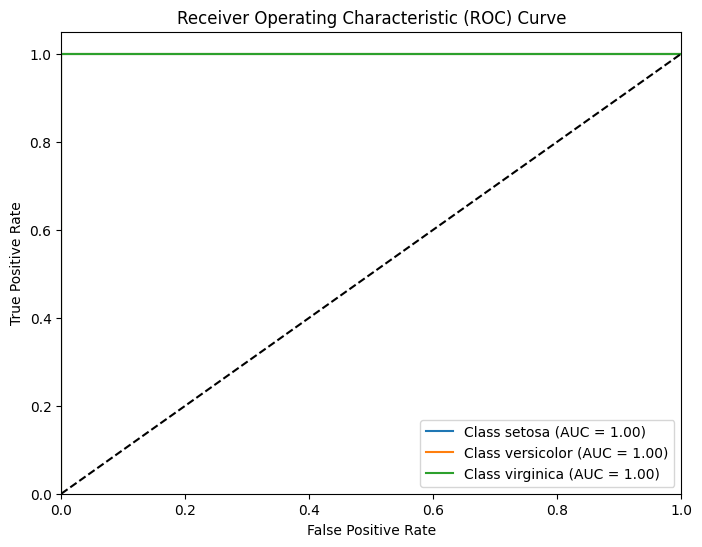

In [8]:
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    y_true_binary = (y_test == i).astype(int)
    y_score = clf.predict_proba(X_test)[:, i]
    fpr, tpr, _ = roc_curve(y_true_binary, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class %s (AUC = %0.2f)' % (iris.target_names[i], roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

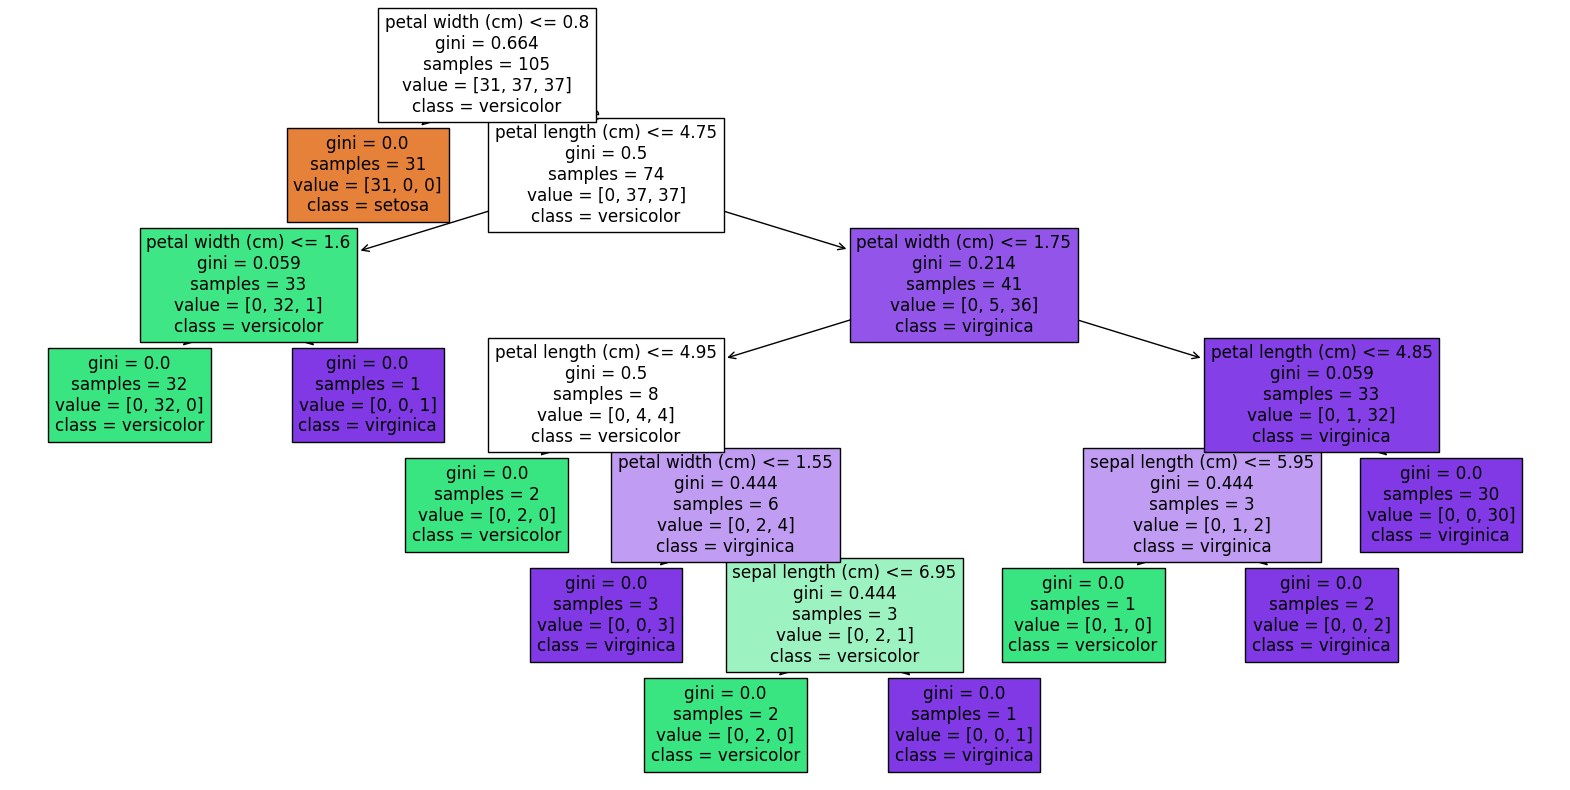

In [9]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()